<a href="https://colab.research.google.com/github/samiul272/ColabNotebooks/blob/master/ddsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/josephdviviano/pyddsm.git
!cd pyddsm/

Cloning into 'pyddsm'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.


In [0]:
!git clone https://github.com/jimmyyhwu/ddsm-visual-primitives.git

Cloning into 'ddsm-visual-primitives'...
remote: Enumerating objects: 447, done.
remote: Total 447 (delta 0), reused 0 (delta 0), pack-reused 447
Receiving objects: 100% (447/447), 3.73 MiB | 11.99 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [0]:
cd ddsm-visual-primitives/

/content/ddsm-visual-primitives


In [0]:
!./download_data.sh

--2019-11-02 18:06:28--  http://data.csail.mit.edu/places/medical/data/ddsm_patches.tar.gz
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642019840 (3.4G) [application/octet-stream]
Saving to: ‘ddsm_patches.tar.gz’

ddsm_patches.tar.gz 100%[===================>]   3.39G  21.7MB/s    in 2m 47s  

2019-11-02 18:09:15 (20.8 MB/s) - ‘ddsm_patches.tar.gz’ saved [3642019840/3642019840]

--2019-11-02 18:09:15--  http://data.csail.mit.edu/places/medical/data/ddsm_labels.tar.gz
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90255360 (86M) [application/octet-stream]
Saving to: ‘ddsm_labels.tar.gz’

ddsm_labels.tar.gz  100%[===================>]  86.07M  20.4MB/s    in 4.1s    



In [0]:
cd ../pyddsm/utils/

/content/pyddsm/utils


In [0]:
!apt-get install ncftp

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  ncftp
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 270 kB of archives.
After this operation, 1,563 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 ncftp amd64 2:3.2.5-2 [270 kB]
Fetched 270 kB in 1s (401 kB/s)
Selecting previously unselected package ncftp.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../ncftp_2%3a3.2.5-2_amd64.deb ...
Unpacking ncftp (2:3.2.5-2) ...
Setting up ncftp (2:3.2.5-2) ...
update-alternatives: using /usr/bin/ncftp3 to provide /usr/bin/ncftp (ncftp) in auto mode
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
!cd pyddsm/
!ls
!./download.sh

In [0]:
import pandas as pd

pd.read_html('http://www.eng.usf.edu/cvprg/Mammography/Database.html')[0]

In [9]:
from urllib.request import urlopen

import pandas as pd
import numpy as np
from PIL import Image


def getClass(x):
    if 'normal' in x:
        return 'normals'
    elif 'cancer' in x:
        return 'cancers'
    else:
        return 'benigns'


df = pd.read_html('http://www.eng.usf.edu/cvprg/Mammography/Database.html')[0]
volumes = df['VOLUME']
scanner = df['SCANNER']
cls = volumes.apply(getClass)
cdf = pd.read_html(f'http://www.eng.usf.edu/cvprg/Mammography/DDSM/thumbnails/{cls[1]}/{volumes[1]}/overview.html')[0] \
    .values.flatten()
cdf = [i for i in cdf if type(i) == str]

links = [
    f'ftp://figment.csee.usf.edu/pub/DDSM/cases/{cls[1]}/{volumes[1]}/{cdf[1]}/{cdf[1].upper()}_1.LEFT_CC.LJPEG',
    f'ftp://figment.csee.usf.edu/pub/DDSM/cases/{cls[1]}/{volumes[1]}/{cdf[1]}/{cdf[1]}_1.RIGHT_CC.LJPEG',
    f'ftp://figment.csee.usf.edu/pub/DDSM/cases/{cls[1]}/{volumes[1]}/{cdf[1]}/{cdf[1]}_1.LEFT_MLO.LJPEG',
    f'ftp://figment.csee.usf.edu/pub/DDSM/cases/{cls[1]}/{volumes[1]}/{cdf[1]}/{cdf[1]}_1.RIGHT_MLO.LJPEG'
]
# im = Image.open(urlopen(links[0]).read())
# im.show()

print(links[0])
print(cdf)


ftp://figment.csee.usf.edu/pub/DDSM/cases/normals/normal_02/case0201/CASE0201_1.LEFT_CC.LJPEG
['case0200', 'case0201', 'case0202', 'case0203', 'case0204', 'case0205', 'case0206', 'case0207', 'case0208', 'case0209', 'case0210', 'case0211', 'case0212', 'case0214', 'case0215', 'case0216', 'case0217', 'case0218', 'case0219', 'case0220', 'case0221', 'case0222', 'case0223', 'case0224', 'case0225', 'case0226', 'case0227', 'case0229', 'case0230', 'case0232', 'case0233', 'case0234', 'case0235', 'case0236', 'case0237', 'case0238', 'case0239', 'case0240', 'case0241', 'case0242', 'case0243', 'case0244', 'case0245', 'case0246', 'case0247', 'case0249', 'case0250', 'case0251', 'case0252', 'case0253', 'case0254', 'case0255', 'case0256', 'case0257', 'case0258', 'case0259', 'case0260', 'case0261', 'case0262', 'case0263', 'case0264', 'case0265', 'case0266', 'case0267', 'case0268', 'case0269', 'case0270', 'case0271', 'case0272', 'case0273', 'case0274', 'case0275', 'case0276', 'case0277', 'case0278', 'case

In [11]:
!wget ftp://figment.csee.usf.edu/pub/DDSM/cases/normals/normal_01/case0002/A_0002_1.LEFT_CC.LJPEG

--2019-11-03 16:02:36--  ftp://figment.csee.usf.edu/pub/DDSM/cases/normals/normal_01/case0002/A_0002_1.LEFT_CC.LJPEG
           => ‘A_0002_1.LEFT_CC.LJPEG’
Resolving figment.csee.usf.edu (figment.csee.usf.edu)... 131.247.2.111
Connecting to figment.csee.usf.edu (figment.csee.usf.edu)|131.247.2.111|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DDSM/cases/normals/normal_01/case0002 ... done.
==> SIZE A_0002_1.LEFT_CC.LJPEG ... 7473601
==> PASV ... done.    ==> RETR A_0002_1.LEFT_CC.LJPEG ... done.
Length: 7473601 (7.1M) (unauthoritative)

A_0002_1.LEFT_CC.LJ 100%[===================>]   7.13M  1.86MB/s    in 4.2s    

2019-11-03 16:02:43 (1.70 MB/s) - ‘A_0002_1.LEFT_CC.LJPEG’ saved [7473601]



In [5]:
# !git clone https://github.com/aaalgo/ljpeg.git
!apt-get install flex
!cd ljpeg/jpegdir/; make

Reading package lists... Done
Building dependency tree       
Reading state information... Done
flex is already the newest version (2.6.4-6).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
cc -O3   -c jpeg.c 
jpeg.c:102:18: warning: initialization makes integer from pointer without a cast [-Wint-conversion]
 int HuffmanTrace=NULL;        /* When set, dumps Huffman statistics */
                  ^~~~
jpeg.c: In function ‘JpegEncodeScan’:
jpeg.c:735:5: warning: implicit declaration of function ‘WriteDnl’; did you mean ‘WriteDht’? [-Wimplicit-function-declaration]
     WriteDnl();  /* Automatically write a dnl if no resync is enabled.*/
     ^~~~~~~~
     WriteDht
jpeg.c: In function ‘JpegLosslessDecodeScan’:
jpeg.c:1405:11: warning: implicit declaration of function ‘CheckMarker’; did you mean ‘DoAllMarker’? [-Wimplicit-function-declaration]
       if (CheckMarker()==0xdc)
           ^~~~~~~~~~~
           DoAllMarker
jpeg.c: In function ‘PrintImage’:
jpeg.c:1723:26: war

In [0]:
from ljpeg import ljpeg

x = ljpeg.read('A_0002_1.LEFT_CC.LJPEG').astype('float')

In [0]:
import numpy as np
x = np.array(x)
x = x/np.max(x)

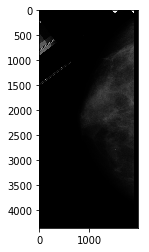

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x, cmap = 'gray')

In [12]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)